# Carbon Intensity Analysis - Group-2
## Objective:
To analyze carbon intensity (CI) data across sectors, regions, and value chain stages using the PCF-Database, identifying significant differences to help Global Trade Alliance reduce the environmental impact of their distributed products.

## Task Description:
As a sustainability data analyst at EcoFuture Analytics, your task is to analyze CI data from the PCF-Database to identify sectoral, regional, and value chain differences. Using statistical tests and visualizations, you will provide insights to Global Trade Alliance for developing policies to minimize their products' carbon footprint.


In [2]:
#import necessary packages for the objective
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

##### Read the source data to a pandas datafarme, inspect its key features and clean the data for further analysis

Dataset Preview:
         *PCF-ID  Year of reporting *Stage-level CO2e available  \
0  10056-1-2014               2014                         Yes   
1  10056-1-2015               2015                         Yes   
2  10222-1-2013               2013                         Yes   
3  10261-1-2017               2017                         Yes   
4  10261-2-2017               2017                         Yes   

                  Product name (and functional unit)  \
0                           Frosted Flakes(R) Cereal   
1  Frosted Flakes, 23 oz, produced in Lancaster, ...   
2                                       Office Chair   
3                             Multifunction Printers   
4                             Multifunction Printers   

                                      Product detail               Company  \
0  Frosted Flakes(R), 23 oz., Produced in Lancast...       Kellogg Company   
1                                             Cereal       Kellogg Company   
2             

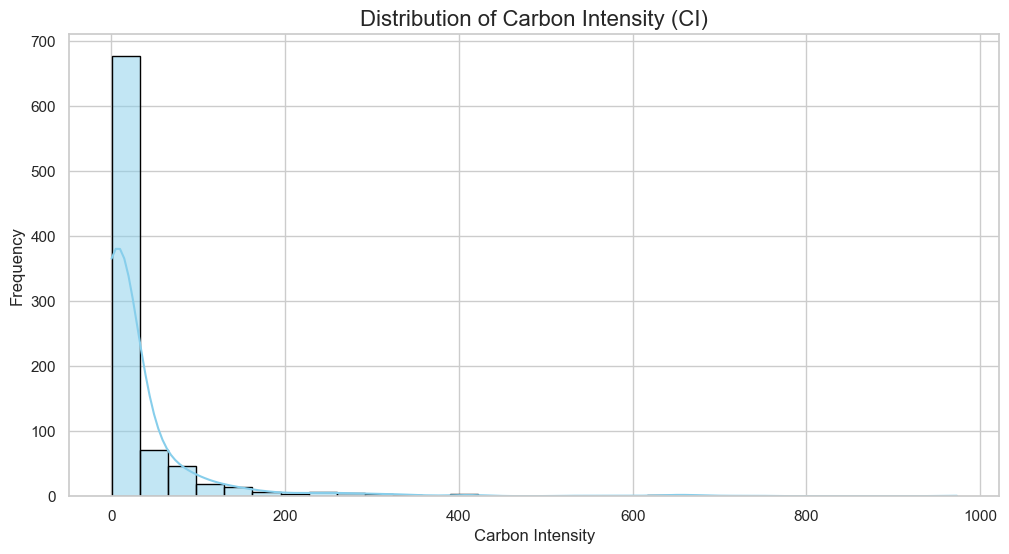


Sector Summary:
                       *Company's sector        mean   min     max  count
0              Automobiles & components   21.599867  0.99   84.36     75
1                             Chemicals    5.173017  0.12   94.00    116
2         Comm. equipm. & capital goods  106.041607  0.28  973.22     56
3                Computer, IT & telecom   75.294625  0.12  736.50    253
4   Construction & commercial materials    1.178955  0.21    6.51     67
5                       Food & Beverage    5.087266  0.11   74.64    139
6  Home durables, textiles, & equipment   13.283033  0.40  235.91    122
7          Packaging for consumer goods    1.276053  0.23    2.72     38


C:\Users\ROG\AppData\Local\Temp\ipykernel_7744\4259152168.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mean', y='*Company\'s sector', data=sector_summary.sort_values(by='mean', ascending=False),


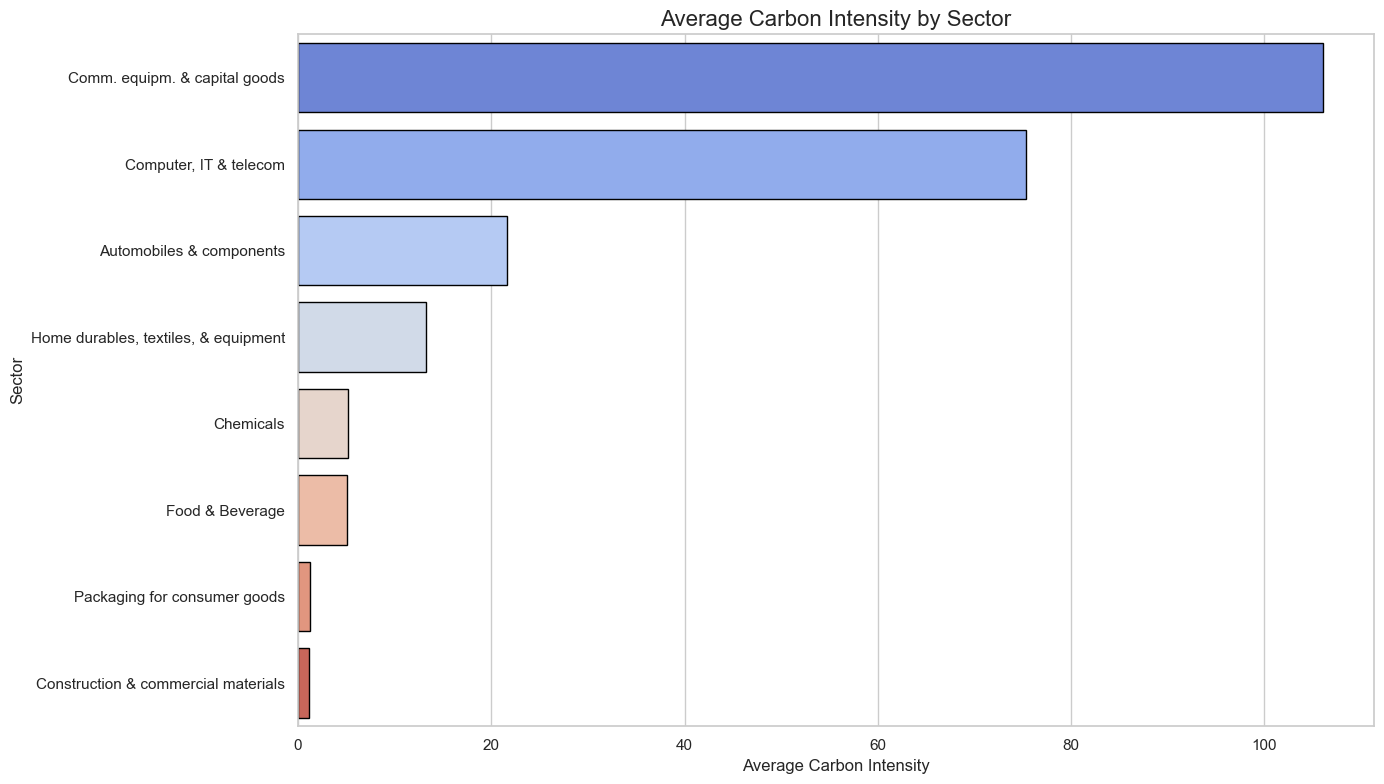


Country Summary:
    Country (where company is incorporated)  *Carbon intensity
0                                Australia          10.500000
1                                  Belgium           1.175000
2                                   Brazil         106.168235
3                                   Canada         370.148333
4                                    Chile           0.516667
5                                    China          44.586667
6                                 Colombia           0.175000
7                                  Finland           9.669714
8                                   France          60.863500
9                                  Germany          20.763582
10                                  Greece           0.700000
11                                   India           1.536250
12                               Indonesia           0.720000
13                                 Ireland           0.855000
14                                   Italy         

C:\Users\ROG\AppData\Local\Temp\ipykernel_7744\4259152168.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='*Carbon intensity', y='Country (where company is incorporated)', data=top_countries,


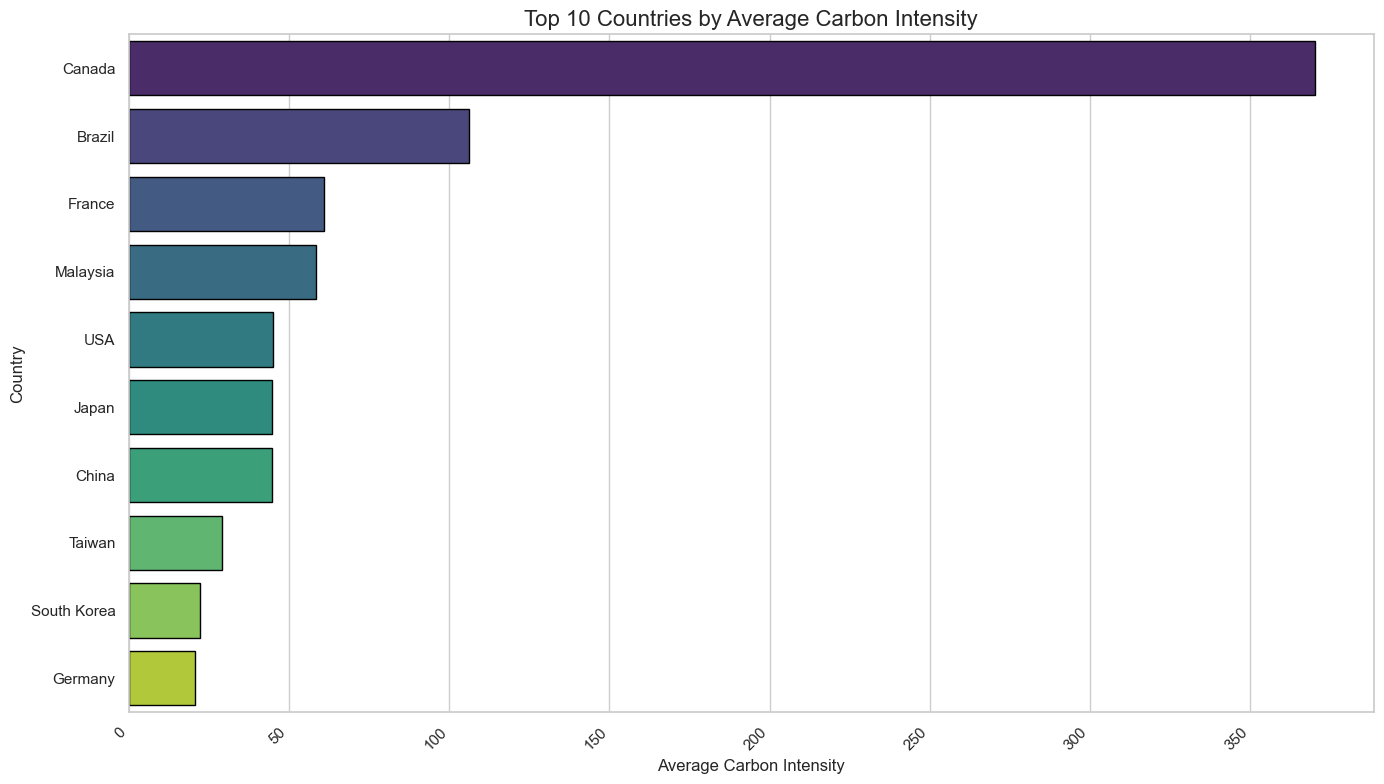

In [4]:
# Setting a Seaborn style
sns.set_theme(style="whitegrid", palette="pastel")  # Choose a clean and colorful theme

# Load the dataset
file_path = r'CarbonCatalogueDataDescriptor.xlsx'
sheet_name = 'Product Level Data'  # Replace with the actual sheet name
source_ci_df = pd.read_excel(file_path, sheet_name=sheet_name)

# Preview the first few rows of the dataset
print("Dataset Preview:\n", source_ci_df.head())

# Check for missing values
missing_values = source_ci_df.isnull().sum()
print("\nMissing Values:\n", missing_values)

# Check data types
print("\nData Types:\n", source_ci_df.dtypes)

# Remove duplicates (if any)
source_ci_df = source_ci_df.drop_duplicates()

# Basic statistics
print("\nBasic Statistics:\n", source_ci_df.describe())

# Verify column names
print("\nColumn Names:\n", source_ci_df.columns)

# Explore unique values in key columns
if '*Company\'s sector' in source_ci_df.columns and '*Carbon intensity' in source_ci_df.columns:
    print("\nUnique Sectors:\n", source_ci_df['*Company\'s sector'].unique())
    print("\nUnique Countries:\n", source_ci_df['Country (where company is incorporated)'].unique())

    # Check the distribution of carbon intensity (CI)
    plt.figure(figsize=(12, 6))
    sns.histplot(source_ci_df['*Carbon intensity'].dropna(), kde=True, bins=30, color="skyblue", edgecolor="black")
    plt.title('Distribution of Carbon Intensity (CI)', fontsize=16)
    plt.xlabel('Carbon Intensity', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.show()

    # Group by sector and calculate average, min, and max CI
    sector_summary = source_ci_df.groupby('*Company\'s sector')['*Carbon intensity'].agg(['mean', 'min', 'max', 'count']).reset_index()
    print("\nSector Summary:\n", sector_summary)

    # Plot the average CI by sector
    plt.figure(figsize=(14, 8))
    sns.barplot(x='mean', y='*Company\'s sector', data=sector_summary.sort_values(by='mean', ascending=False), 
                palette='coolwarm', edgecolor="black")
    plt.title('Average Carbon Intensity by Sector', fontsize=16)
    plt.xlabel('Average Carbon Intensity', fontsize=12)
    plt.ylabel('Sector', fontsize=12)
    plt.tight_layout()
    plt.show()

    # Group by country and calculate average CI
    country_summary = source_ci_df.groupby('Country (where company is incorporated)')['*Carbon intensity'].mean().reset_index()
    print("\nCountry Summary:\n", country_summary)

    # Plot the average CI by country (top 10 countries)
    top_countries = country_summary.sort_values(by='*Carbon intensity', ascending=False).head(10)
    plt.figure(figsize=(14, 8))
    sns.barplot(x='*Carbon intensity', y='Country (where company is incorporated)', data=top_countries,
                palette='viridis', edgecolor="black")
    plt.title('Top 10 Countries by Average Carbon Intensity', fontsize=16)
    plt.xlabel('Average Carbon Intensity', fontsize=12)
    plt.ylabel('Country', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("Required columns not found in the dataset. Verify column names!")


### 1. Comparing the carbon intensity across company's sectors
#### Objectives:
* Perform statistical analysis to find the significant differences in average carbon intensity (CI) among sectors.
* Find any sectors with overlapping CI ranges that make it difficult to distinguish their environmental performance.* The possiblee reasons of the difference found.


In [6]:
####### Inspecting data########
display(source_ci_df.head())
display(source_ci_df.info())

,*PCF-ID,Year of reporting,*Stage-level CO2e available,Product name (and functional unit),Product detail,Company,Country (where company is incorporated),Company's GICS Industry Group,Company's GICS Industry,*Company's sector,...,Relative change in PCF vs previous,Company-reported reason for change,*Change reason category,*%Upstream estimated from %Operations,*Upstream CO2e (fraction of total PCF),*Operations CO2e (fraction of total PCF),*Downstream CO2e (fraction of total PCF),*Transport CO2e (fraction of total PCF),*EndOfLife CO2e (fraction of total PCF),*Adjustments to raw data (if any)
0,10056-1-2014,2014,Yes,Frosted Flakes(R) Cereal,"Frosted Flakes(R), 23 oz., Produced in Lancast...",Kellogg Company,USA,"Food, Beverage & Tobacco",Food Products,Food & Beverage,...,(not reported by company),N/a,N/a (no %change reported),No,0.575,0.3,0.125,0.045,(included in downstream but not reported separ...,Divided stage and total emissions by 1000 (bas...
1,10056-1-2015,2015,Yes,"Frosted Flakes, 23 oz, produced in Lancaster, ...",Cereal,Kellogg Company,USA,Food & Beverage Processing,Not used for 2015 reporting,Food & Beverage,...,(not reported by company),N/a,N/a (no %change reported),No,0.575,0.3,0.125,0.045,(included in downstream but not reported separ...,Divided stage and total emissions by 1000 (bas...
2,10222-1-2013,2013,Yes,Office Chair,Field not included in 2013 data,KNOLL INC,USA,Capital Goods,Building Products,Comm. equipm. & capital goods,...,(not reported by company),N/a,N/a (no previous data available),Yes,0.8063,0.1736,0.0201,(included in up/downstream but not reported se...,0,"Changed %change to zero, according to field ""c..."
3,10261-1-2017,2017,Yes,Multifunction Printers,bizhub C458,"Konica Minolta, Inc.",Japan,Technology Hardware & Equipment,"Electronic Equipment, Instruments & Components","Computer, IT & telecom",...,(not reported by company),N/a,N/a (no previous data available),No,0.3065,0.0551,0.6384,0.0101,0.0276,NaN
4,10261-2-2017,2017,Yes,Multifunction Printers,bizhub C558,"Konica Minolta, Inc.",Japan,Technology Hardware & Equipment,"Electronic Equipment, Instruments & Components","Computer, IT & telecom",...,(not reported by company),N/a,N/a (no previous data available),No,0.2508,0.0451,0.7041,0.0083,0.0226,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 866 entries, 0 to 865
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   *PCF-ID                                    866 non-null    object 
 1   Year of reporting                          866 non-null    int64  
 2   *Stage-level CO2e available                866 non-null    object 
 3   Product name (and functional unit)         866 non-null    object 
 4   Product detail                             856 non-null    object 
 5   Company                                    866 non-null    object 
 6   Country (where company is incorporated)    866 non-null    object 
 7   Company's GICS Industry Group              866 non-null    object 
 8   Company's GICS Industry                    866 non-null    object 
 9   *Company's sector                          866 non-null    object 
 10  Product weight (kg)       

None

In [7]:
#### Cleaning the dataframe ####

### Filtering limited columns that are relevant for the analysis ###
ci_df = source_ci_df[['*PCF-ID','Year of reporting','Product name (and functional unit)','Product detail','Company',"*Company's sector",'*Carbon intensity']]
ci_df = ci_df.dropna(subset=['*Carbon intensity'])
ci_df.columns = ci_df.columns.str.replace('*', '', regex=False)
ci_df = ci_df.rename(columns={"Company's sector": 'Company\'s sector'})
display(ci_df.head())

,PCF-ID,Year of reporting,Product name (and functional unit),Product detail,Company,Company's sector,Carbon intensity
0,10056-1-2014,2014,Frosted Flakes(R) Cereal,"Frosted Flakes(R), 23 oz., Produced in Lancast...",Kellogg Company,Food & Beverage,2.67
1,10056-1-2015,2015,"Frosted Flakes, 23 oz, produced in Lancaster, ...",Cereal,Kellogg Company,Food & Beverage,2.67
2,10222-1-2013,2013,Office Chair,Field not included in 2013 data,KNOLL INC,Comm. equipm. & capital goods,3.51
3,10261-1-2017,2017,Multifunction Printers,bizhub C458,"Konica Minolta, Inc.","Computer, IT & telecom",13.53
4,10261-2-2017,2017,Multifunction Printers,bizhub C558,"Konica Minolta, Inc.","Computer, IT & telecom",16.53


##### Inspecting key features of compay's sectors

Number of Sectors: 8
['Food & Beverage' 'Comm. equipm. & capital goods'
 'Computer, IT & telecom' 'Chemicals'
 'Construction & commercial materials'
 'Home durables, textiles, & equipment' 'Packaging for consumer goods'
 'Automobiles & components']
-----------------------------------------------


Company's sector
Computer, IT & telecom                  253
Food & Beverage                         139
Home durables, textiles, & equipment    122
Chemicals                               116
Automobiles & components                 75
Construction & commercial materials      67
Comm. equipm. & capital goods            56
Packaging for consumer goods             38
Name: count, dtype: int64

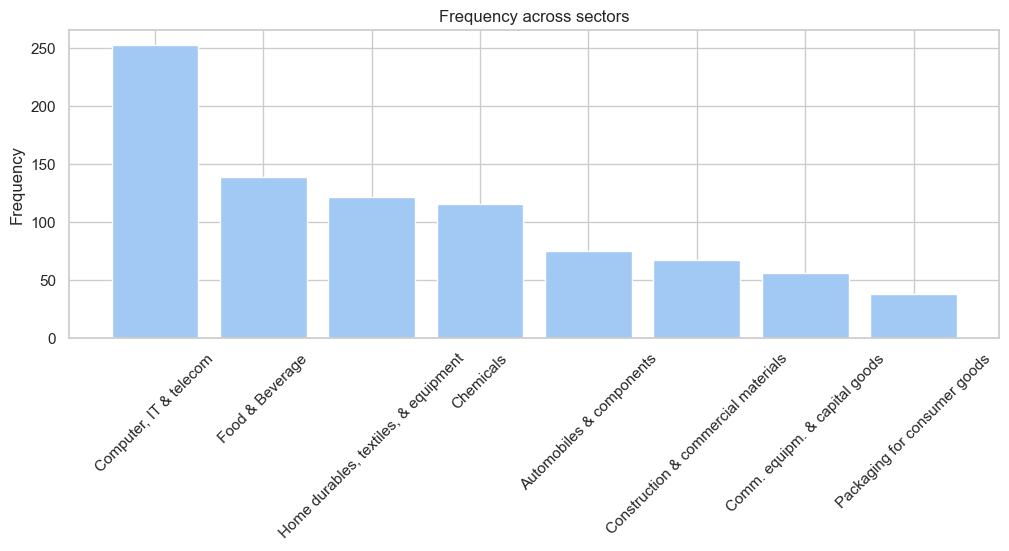

In [9]:
sectors = ci_df['Company\'s sector'].unique()
print(f"Number of Sectors: {len(sectors)}")
print(sectors)
print("-----------------------------------------------")
### ploting the frequency of entities across sectors ##
sector_counts = ci_df['Company\'s sector'].value_counts()
display(sector_counts)
plt.figure(figsize=(12, 4))
plt.bar(sector_counts.index, sector_counts.values)
plt.ylabel('Frequency')
plt.title('Frequency across sectors')
plt.xticks(rotation=45)
plt.show()

##### Plot the total carbon intensity across the sectors to understand which sector has the highest CI proportion.

C:\Users\ROG\AppData\Local\Temp\ipykernel_7744\2531423166.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


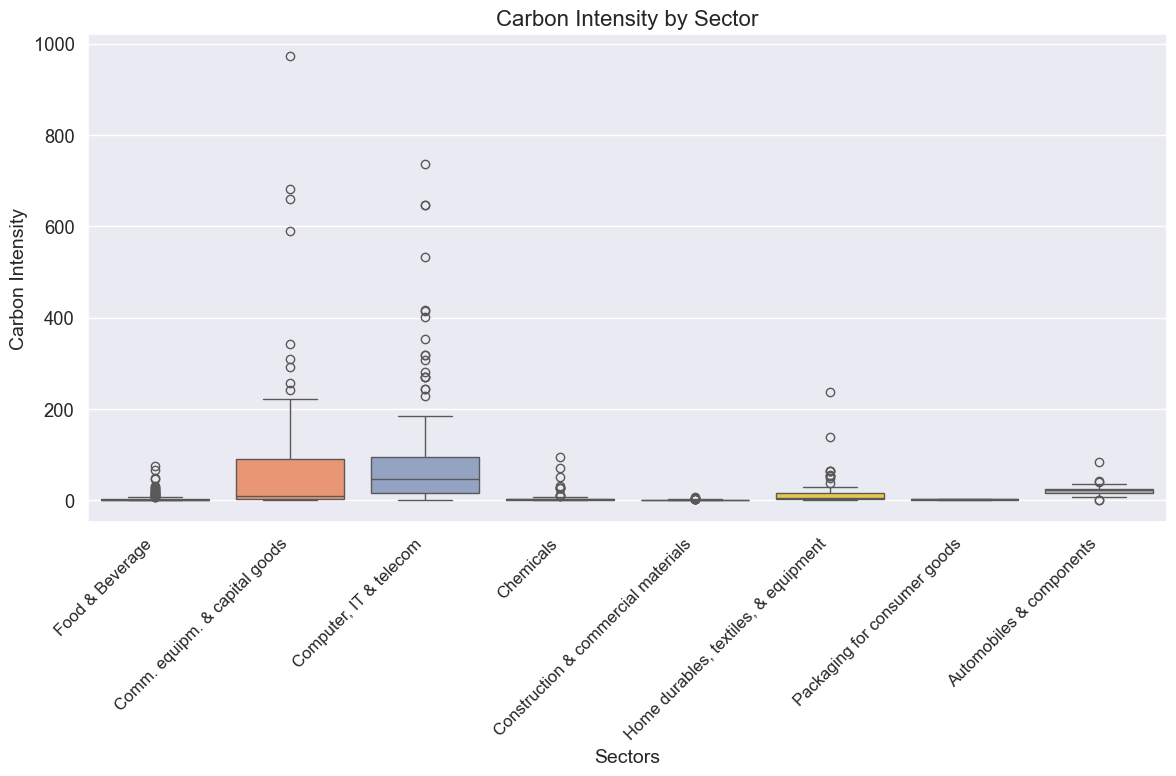

In [59]:
plt.figure(figsize=(12, 8))  # Adjust figure size for better readability

# Create the boxplot
sns.boxplot(
    x="Company's sector", 
    y="Carbon intensity", 
    data=ci_df, 
    palette="Set2"  # Optional: Use a color palette for distinction
)

# Improve x-axis label readability
plt.xlabel('Sectors', fontsize=14)
plt.ylabel('Carbon Intensity', fontsize=14)
plt.title('Carbon Intensity by Sector', fontsize=16)

# Rotate x-axis labels and align them for readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Adjust layout to fit everything nicely
plt.tight_layout()

plt.show()


##### Plot individual ci vs sector to understand how the values are distributed across each individual sector

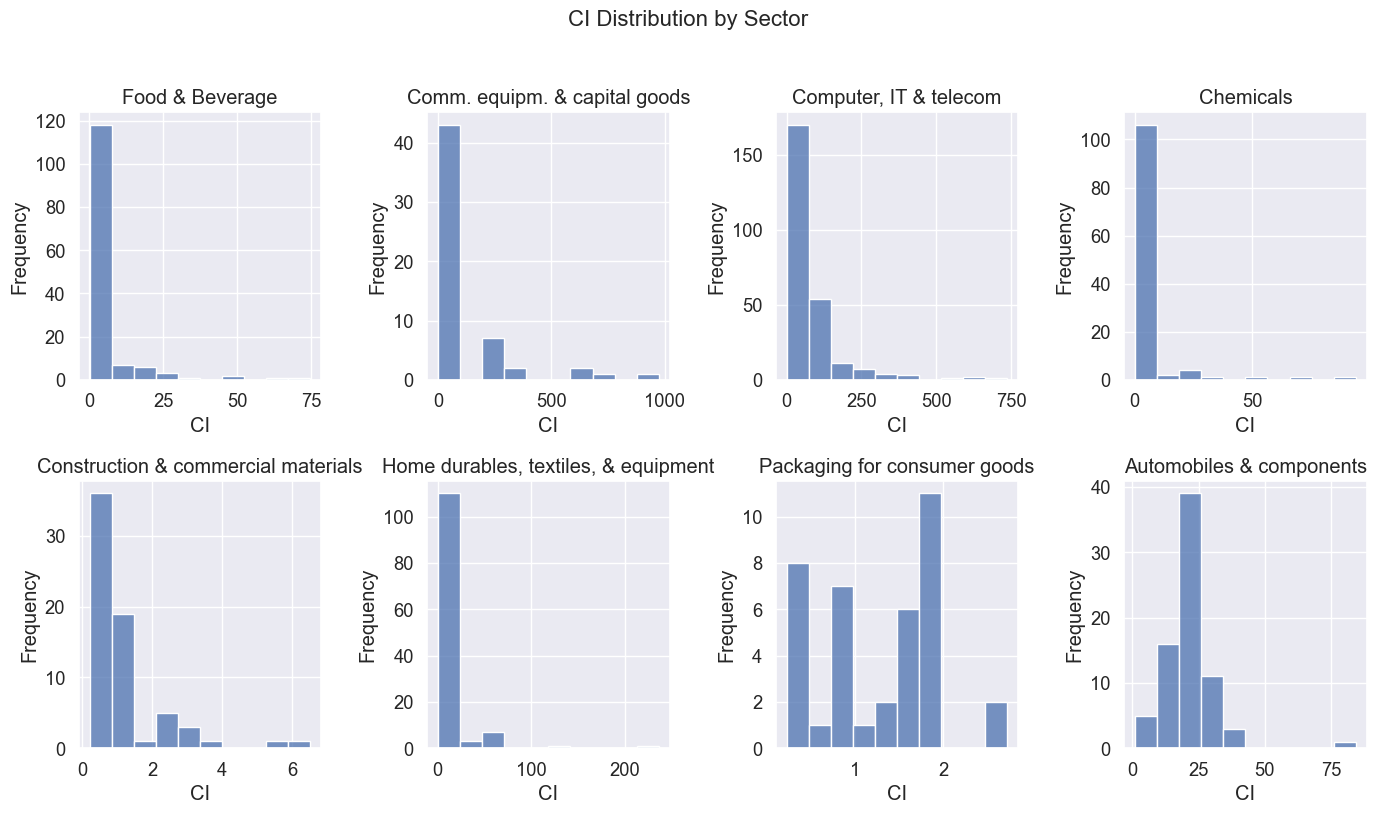

In [61]:
# Get unique sectors
sectors = ci_df['Company\'s sector'].unique()

# Create subplots
fig, axes = plt.subplots(2, 4, figsize=(14, 8), sharex=False, sharey=False)

for ax, sector in zip(axes.flatten(), sectors):
    sector_data = ci_df[ci_df['Company\'s sector'] == sector]
    sns.histplot(sector_data['Carbon intensity'], bins=10, ax=ax)
    ax.set_title(f"{sector}")
    ax.set_xlabel('CI')
    ax.set_ylabel('Frequency')

fig.suptitle('CI Distribution by Sector', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


In [14]:
print(ci_df.describe())

       Year of reporting  Carbon intensity
count         866.000000        866.000000
mean         2014.762125         34.252968
std             1.236720         84.599082
min          2013.000000          0.110000
25%          2014.000000          1.320000
50%          2015.000000          5.400000
75%          2016.000000         26.000000
max          2017.000000        973.220000


##### Observations and conclusions:
* Significant differences in sample sizes are observed between sectors such as "Computer, IT & Telecom" and "Packaging for Consumer Goods."

* A violin plot comparison reveals considerable variance in carbon intensity (CI) distributions. Sectors like Food & Beverage, Communication Equipment & Capital Goods, Computer, IT & Telecom, and Chemicals exhibit pronounced tails and broader density ranges, indicating a substantial spread in CI values within these sectors, with extreme values visibly represented at the edges of the violins.

* The histogram plots illustrate the CI distribution across individual sectors. Upon examination, the distribution appears normal for some sectors; however, sectors such as Food & Beverage and Chemicals show a concentration of values skewed toward the lower end.'

#### Perform statistical analysis to find the significant differences in average carbon intensity (CI) among sectors

##### Performing ANOVA to understand the differences

In [17]:
groups = [ci_df[ci_df['Company\'s sector'] == group]['Carbon intensity'] for group in ci_df['Company\'s sector'].unique()]
f_stat, p_value = stats.f_oneway(*groups)
print(f'ANOVA result for CI: F-statistic = {f_stat}, p-value = {p_value}')
if p_value < 0.5:
    print('Significant differences found in CI accross Company sectors')

ANOVA result for CI: F-statistic = 26.818165245662108, p-value = 2.2201664774717847e-33
Significant differences found in CI accross Company sectors


##### Conclusion:
The ANOVA results for carbon intensity (CI), with an F-statistic of 26.82 and a p-value of 2.22e-33, indicate significant differences in CI across company sectors. This suggests that the sectors exhibit varying carbon intensity levels, likely influenced by industry-specific factors, operational practices, or resource usage.

Further Steps:
* Post-Hoc Testing: Conduct post-hoc pairwise comparisons (e.g., Tukey HSD test) to identify which specific sectors differ significantly in terms of CI.
* Sector Analysis: Investigate the underlying factors contributing to these differences by examining sector-specific practices, technologies, and sustainability initiatives.
* Visual Representation: Use additional visualizations, such as box plots or violin plots, to further illustrate the spread and distribution of CI values within each sector.

#### Performing post hoc testing with Tukey HSD group pair comparison

In [20]:
ci_tukey = pairwise_tukeyhsd(ci_df['Carbon intensity'], ci_df['Company\'s sector'])
print(ci_tukey.summary())

                                Multiple Comparison of Means - Tukey HSD, FWER=0.05                                 
               group1                               group2                 meandiff p-adj    lower    upper   reject
--------------------------------------------------------------------------------------------------------------------
            Automobiles & components                            Chemicals  -16.4268  0.838   -51.066  18.2123  False
            Automobiles & components        Comm. equipm. & capital goods   84.4417    0.0    43.154 125.7295   True
            Automobiles & components               Computer, IT & telecom   53.6948    0.0   22.9581  84.4314   True
            Automobiles & components  Construction & commercial materials  -20.4209  0.763  -59.7204  18.8785  False
            Automobiles & components                      Food & Beverage  -16.5126 0.8087  -50.0075  16.9823  False
            Automobiles & components Home durables, textiles, & 

In [21]:
# convert the summary to a pondas dataframe 
ci_tukey_df = pd.DataFrame(data=ci_tukey._results_table.data[1:], columns=ci_tukey._results_table.data[0])
ci_df_sorted = ci_tukey_df.sort_values(by='meandiff', key=abs, ascending=False)
ci_df_sorted.head()

,group1,group2,meandiff,p-adj,lower,upper,reject
14,Comm. equipm. & capital goods,Construction & commercial materials,-104.8627,0.0,-147.1910,-62.5343,True
17,Comm. equipm. & capital goods,Packaging for consumer goods,-104.7656,0.0,-153.9003,-55.6308,True
15,Comm. equipm. & capital goods,Food & Beverage,-100.9543,0.0,-137.9564,-63.9522,True
7,Chemicals,Comm. equipm. & capital goods,100.8686,0.0,62.8276,138.9096,True
16,Comm. equipm. & capital goods,"Home durables, textiles, & equipment",-92.7586,0.0,-130.4938,-55.0234,True


In [22]:
# Investigating the groups
duplicates = ci_df_sorted.duplicated(subset=['group1', 'group2']).sum()
print(f"Number of duplicates: {duplicates}")
print("Group1 and Group2")
display(ci_df_sorted['group1'].unique())
display(ci_df_sorted['group2'].unique())

Number of duplicates: 0
Group1 and Group2


array(['Comm. equipm. & capital goods', 'Chemicals',
       'Automobiles & components', 'Computer, IT & telecom',
       'Construction & commercial materials',
       'Home durables, textiles, & equipment', 'Food & Beverage'],
      dtype=object)

array(['Construction & commercial materials',
       'Packaging for consumer goods', 'Food & Beverage',
       'Comm. equipm. & capital goods',
       'Home durables, textiles, & equipment', 'Computer, IT & telecom',
       'Chemicals'], dtype=object)

##### Plotting the groups vs meandiff over a heat map to examine the differences.

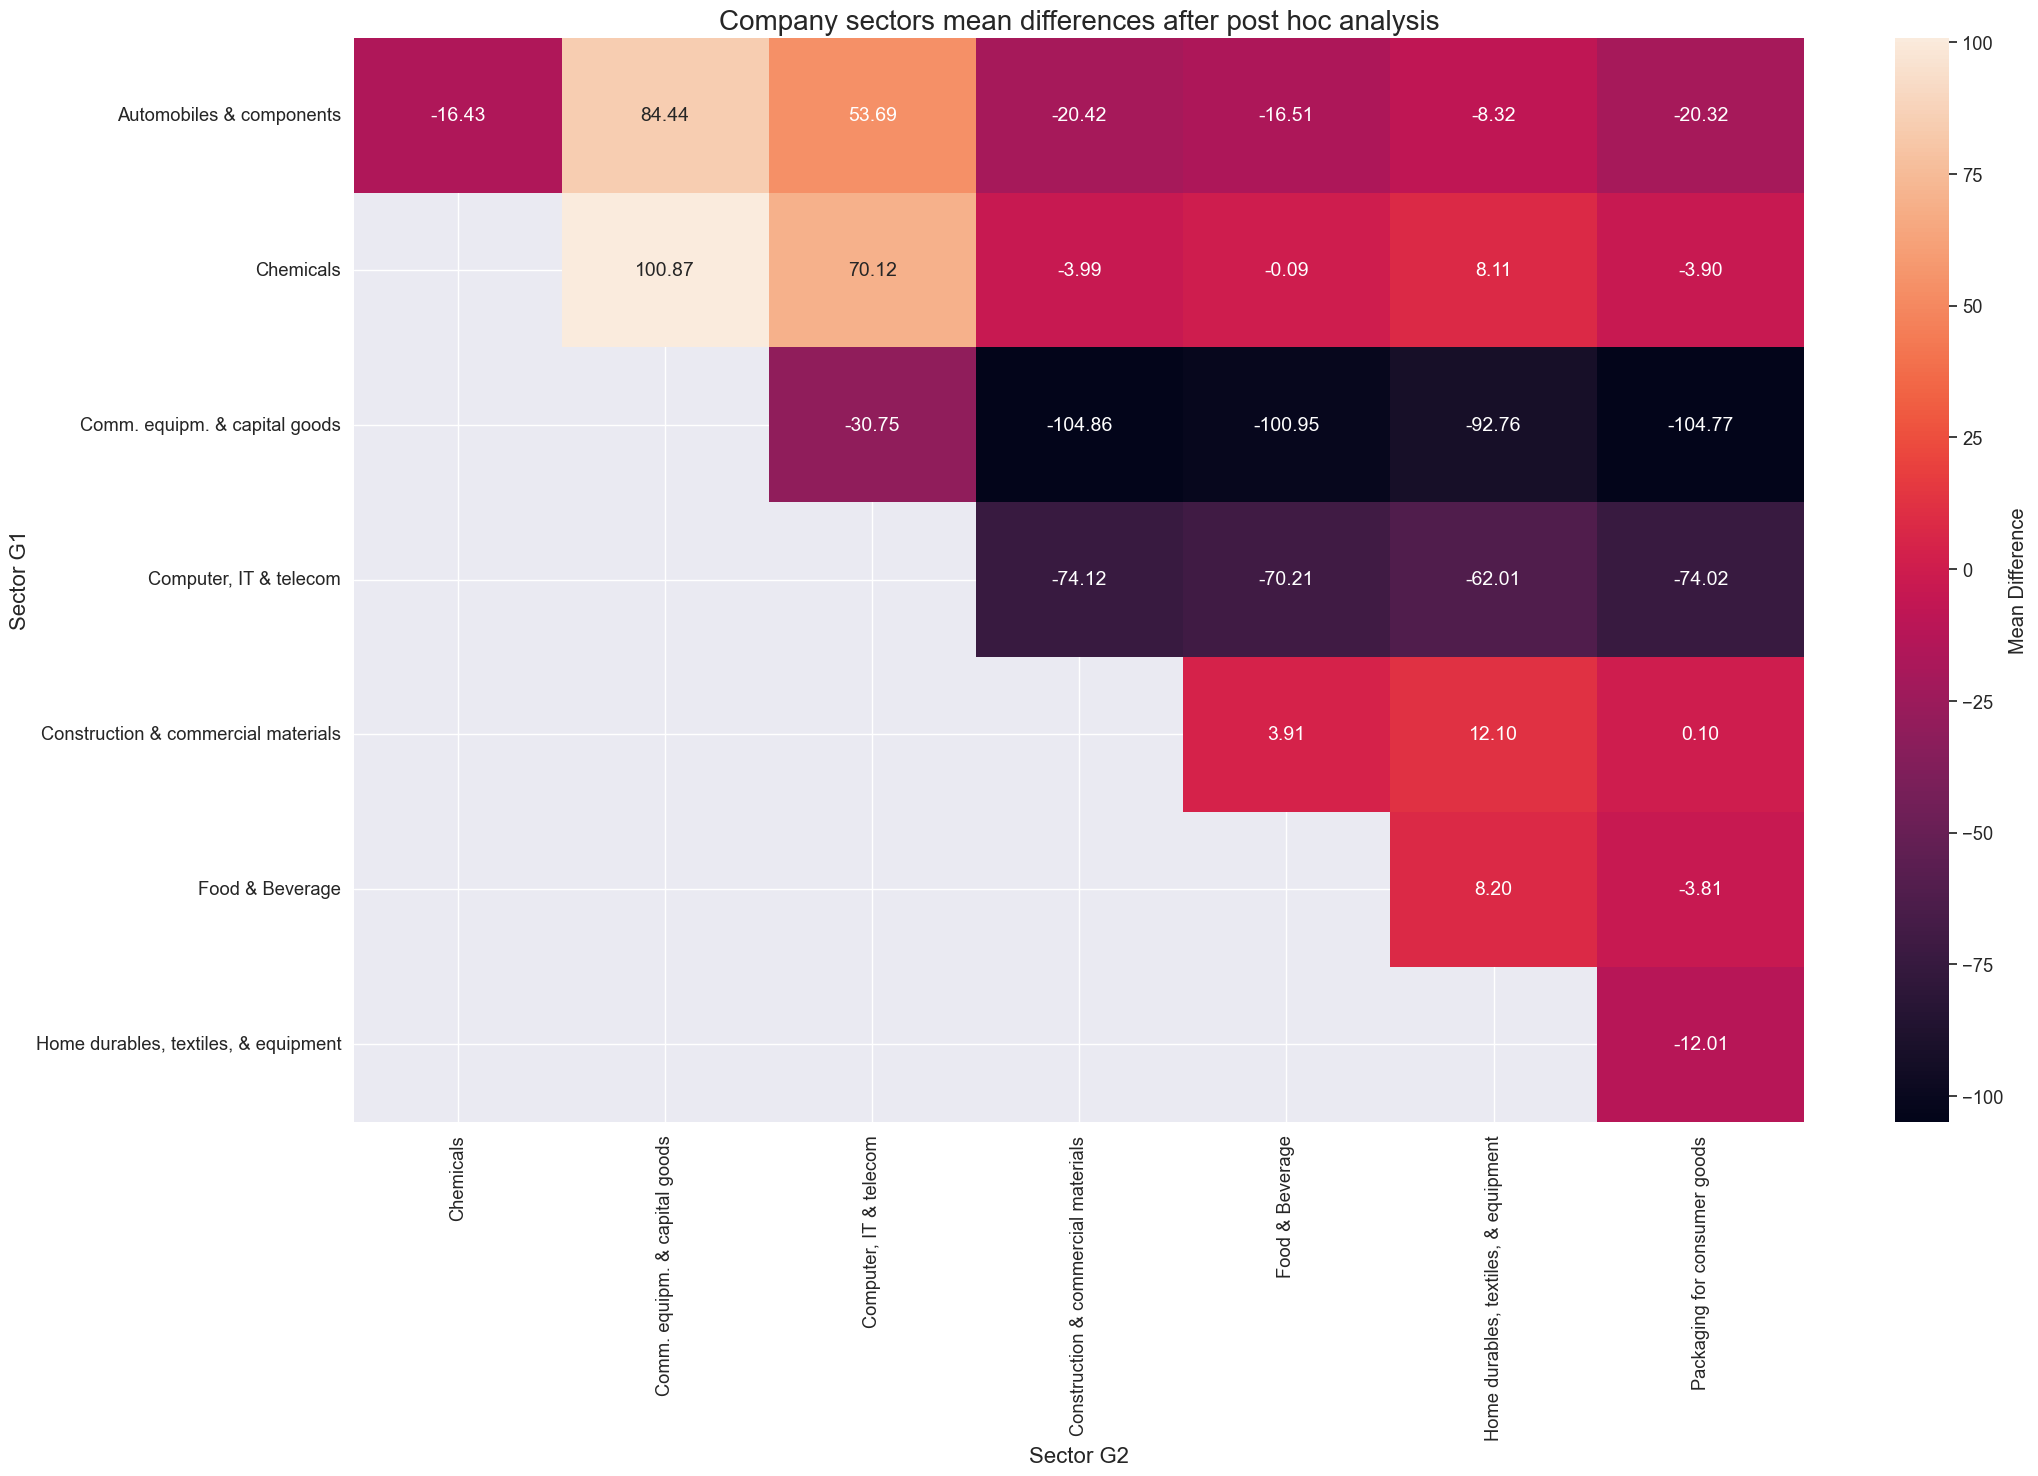

In [50]:
# Increase font sizes for the heatmap
plt.figure(figsize=(22, 15))

sns.set(font_scale=1.2)  # Set overall font scale for the heatmap
sns.heatmap(
    heatmap_ci_data, 
    annot=True, 
    fmt=".2f", 
    cbar_kws={'label': 'Mean Difference'},
    annot_kws={"size": 14},  # Annotation font size
)

# Update the title and axis labels with specific font sizes
plt.title('Company sectors mean differences after post hoc analysis', fontsize=20)
plt.xlabel('Sector G2', fontsize=16)
plt.ylabel('Sector G1', fontsize=16)

# Improve layout
plt.tight_layout()
plt.show()


### Conclusion:
The results from the Tukey HSD test and the corresponding heatmap highlight several significant pairwise differences in carbon intensity (CI) between sectors. Among these, the following sector pairs exhibit the highest CI differences, with values exceeding 90:

* Comm. Equipm. & Capital Goods → Construction & Commercial Materials = 104.86
* Comm. Equipm. & Capital Goods → Food & Beverage = 100.95
* Comm. Equipm. & Capital Goods → Home Durables, Textiles, & Equipment = 92.76
* Comm. Equipm. & Capital Goods → Packaging for Consumer Goods = 104.77
  
These values are marked by the same color (dark black) in the heatmap, indicating that these sector pairs have the most significant differences in their carbon intensity levels.

This suggests that sectors such as Comm. Equipm. & Capital Goods and Construction & Commercial Materials, Food & Beverage, and Packaging for Consumer Goods have considerable divergence in their environmental performance. The high CI differences could be attributed to industry-specific factors such as production methods, energy usage, and supply chain practices.

#### Sectors with Overlapping CI Ranges:
* Comm. Equipm. & Capital Goods and Packaging for Consumer Goods: The CI difference between these two sectors is relatively small (104.77) compared to others. This suggests that their CI ranges may overlap significantly, making it challenging to distinguish their carbon intensity levels based purely on the heatmap visualization.
* Comm. Equipm. & Capital Goods and Home Durables, Textiles, & Equipment: With a CI difference of 92.76, these sectors also exhibit a degree of overlap in their CI values, indicating that they might have similar environmental performance in terms of carbon intensity.


### Implications:
* Environmental Impact: The substantial differences in CI between these sectors emphasize the need for tailored sustainability strategies and interventions. Sectors with high CI values, such as Food & Beverage and Packaging for Consumer Goods, may require more stringent measures to reduce their environmental impact.  
* Further Analysis: The similar color patterns in the heatmap suggest that sectors like Comm. Equipm. & Capital Goods and Construction & Commercial Materials exhibit particularly high variability, warranting deeper exploration of their production processes, technologies, and resource usage to understand the root causes of these differences.


### Possible Reasons for the Differences in Carbon Intensity (CI):
* Energy Usage: Sectors like Food & Beverage and Chemicals are more energy-intensive, leading to higher CI, while sectors like IT & Telecom and Packaging for Consumer Goods use less energy.

* Technology & Efficiency: Sectors with advanced technologies and energy-efficient systems (e.g., Comm. Equipm. & Capital Goods) tend to have lower CI.

* Regulation & Sustainability: Stricter environmental regulations in some sectors promote lower CI, whereas others, like Food & Beverage, may lack such incentives.

* Waste Management: Sectors with poor waste management and high waste generation often show higher CI, whereas those with better recycling systems show lower CI.

* Geography: CI is influenced by the region’s energy mix, with areas relying on fossil fuels having higher CI values.